In [162]:
import pandas as pd
# !pip3 install xlrd
# !pip3 install openpyxl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import numpy as np

In [379]:
to_rep = {'A':1,'B':2,'C':3, 'D':4,'E':5,'F':6,'G':7,'H':8}

## read the table:
cur_sheet = pd.read_excel('O3 development.xlsx', engine='openpyxl',sheet_name = 'RUN 15')
needed_cols = ['Thickness'] + ['Unnamed: {}'.format(x) for x in range(2,11)]
cur_sheet = cur_sheet[needed_cols][2:26].reset_index(drop = True)
cur_sheet.columns = ['Thickness']+['Testing: {}'.format(x) for x in range(1,10)]
pos = cur_sheet['Thickness'].str.split('-',expand=True)[[0,1]]
pos.columns = ['Group', 'Position']
pos = pos.join(cur_sheet).replace(to_rep).drop('Thickness',axis = 1)

## creating coordinate for each testing point
pos['Testing: 2'] = pos.apply(lambda x: (x['Group'],int(x['Position']),0),axis = 1)
pos['Testing: 1'] = pos.apply(lambda x: (x['Group'],x['Testing: 2'][1]-1,0), axis = 1)
pos['Testing: 3'] = pos.apply(lambda x: (x['Group'],x['Testing: 2'][1]+1,0), axis = 1)

pos['Testing: 5'] = pos.apply(lambda x: (x['Group'],int(x['Position']),1),axis = 1)
pos['Testing: 4'] = pos.apply(lambda x: (x['Group'],x['Testing: 5'][1]-1,1), axis = 1)
pos['Testing: 6'] = pos.apply(lambda x: (x['Group'],x['Testing: 5'][1]+1,1), axis = 1)

pos['Testing: 8'] = pos.apply(lambda x: (x['Group'],int(x['Position']),2),axis = 1)
pos['Testing: 7'] = pos.apply(lambda x: (x['Group'],x['Testing: 8'][1]-1,2), axis = 1)
pos['Testing: 9'] = pos.apply(lambda x: (x['Group'],x['Testing: 8'][1]+1,2), axis = 1)



(1.0, 8.0)

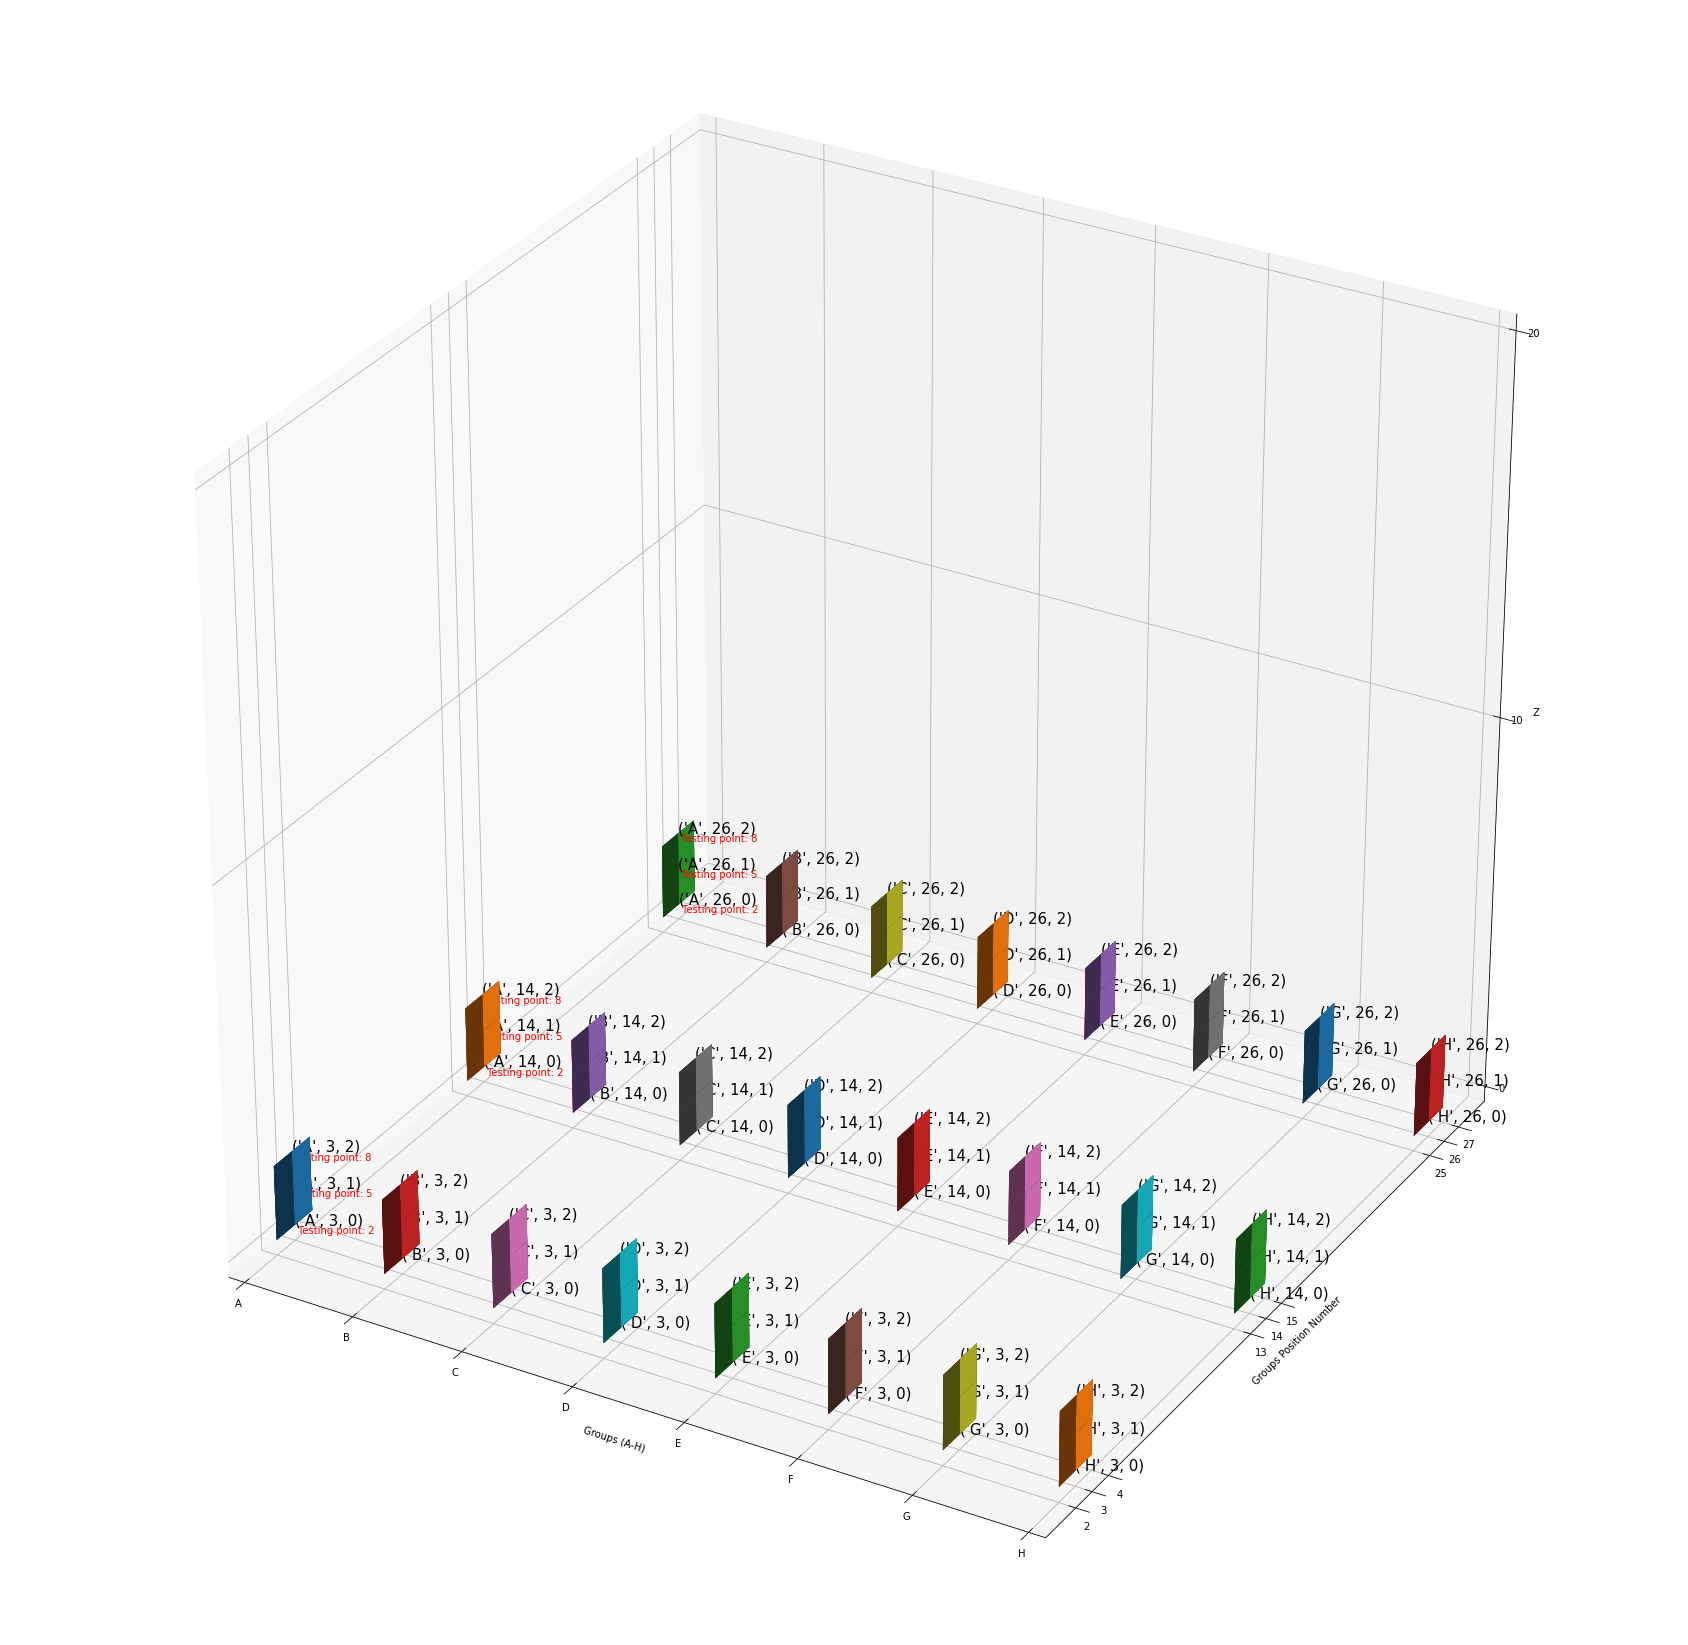

In [411]:
%matplotlib inline 
pos_x = pos[pos.columns[2:]].applymap(lambda x: x[0])
pos_y = pos[pos.columns[2:]].applymap(lambda x: x[1])
pos_z = pos[pos.columns[2:]].applymap(lambda x: x[2])
fig = plt.figure(figsize=(30,30))

ax = plt.subplot( projection='3d')
for i in range(len(pos_x.values)):
    X,Z = np.meshgrid(pos_x.values[i],pos_z.values[i])
    ax.plot_surface(X,pos_y.values[i].reshape(1,-1),Z)

ax.set_xlabel("Groups (A-H)")
ax.set_ylabel("Groups Position Number")
ax.set_zlabel("Z")


for i in range(len(pos_x.values)):
    for (x,y,z) in zip(pos_x.values[i],pos_y.values[i],pos_z.values[i]):
        if y in (3,14,26):
            group = list(to_rep.keys())[list(to_rep.values()).index(x)] 
            ax.text(x, y, z, "{}".format((group,y,z)),size=15)
            if group == 'A':
                ax.text(x, y, z,'\n Testing point: {}'.format(z+(z+1)*2), size = 10,
                       verticalalignment='center',color = 'r')

plt.gca().set_zticks([0,10,20])
plt.gca().set_yticks([2,3,4,13,14,15,25,26,27])
plt.gca().set_xticks([x for x in range(1,11)])
plt.gca().set_xticklabels(['A','B','C','D','E','F','G','H'])
ax.set_xlim(1,8)